In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
data = pd.read_csv('train.csv')

In [187]:
data

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,337,8056,7542,471,58,7,NaN,63.0,47.0,367.0,NaN,0.004584,0.045444,0.007767
59,338,8061,7967,62,29,5,17.0,NaN,26.0,33.0,0.001060,0.002207,0.003992,NaN
60,339,8062,8002,48,14,3,14.0,14.0,33.0,NaN,0.001076,0.002953,NaN,0.001322
61,340,8061,7918,146,16,4,NaN,75.0,43.0,33.0,NaN,0.005307,0.002951,0.008808


### Создаем график - гистограмму

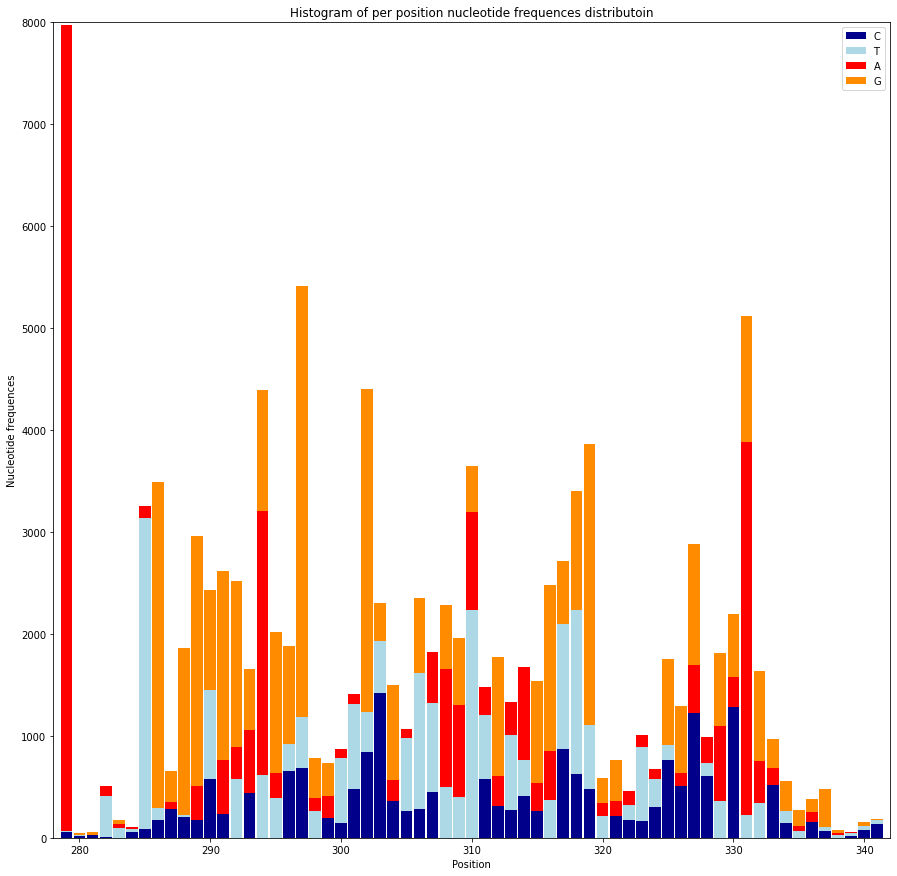

In [188]:
# заполняем NaN нулями, чтобы построить красивый график
npC = np.array(data['C'].fillna(0))
npT = np.array(data['T'].fillna(0))
npA = np.array(data['A'].fillna(0))
npG = np.array(data['G'].fillna(0))

# суммируем значения частот по нуклеотидам для правильного отображения
# барплота с разбивкой по типам нуклеотидов (будут прописаны в bottom):
sum_CT = np.add(npC,npT).tolist()  
sum_ACT = np.add(sum_CT,npA).tolist()

fig, ax = plt.subplots(figsize=(15,15))

plt.bar(data['pos'], npC, color = 'darkblue', label = 'C', width=0.9)
plt.bar(data['pos'], npT, color = 'lightblue', label = 'T', width=0.9, bottom=npC)
plt.bar(data['pos'], npA, color = 'red', label = 'A', width=0.9, bottom=sum_CT)
plt.bar(data['pos'], npG, color = 'darkorange', label = 'G', width=0.9, bottom=sum_ACT)

ax.set_ylabel('Nucleotide frequences')
ax.set_xlabel('Position')
ax.set_title('Histogram of per position nucleotide frequences distribution')
ax.legend()
plt.ylim((0,8000))
plt.xlim((278,342))
plt.show()

### Сохраняем в отдельный файл результаты сортировки датафрейма

In [189]:
# сортируем 
mean_match = np.mean(data['matches']) 
matching = data.query(' matches > @mean_match')[['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']]

matching.to_csv(r'train_part.csv') # сохраняем как .csv

In [191]:
'''
в файл сохранится часть данных:
строки, где matches больше чем среднее
колонки pos, reads_all, mismatches, deletions, insertions
'''

matching

,pos,reads_all,mismatches,deletions,insertions
1,280,8045,48,19,9
2,281,8045,50,16,5
3,282,8049,505,33,65
4,283,8042,155,115,62
5,284,8048,104,864,241
17,296,8039,1883,1308,50
19,298,8047,769,1345,12
20,299,8043,728,1053,60
21,300,8049,862,468,64
22,301,8050,1395,516,51
